# 목적

- 전력 사용량이 2018년 이전 자료는 월 단위로 기록되어 있다.
- 일 단위로 나누어야 한다.
- 자원 투입량, 날씨를 고려하여 일 단위로 나눈다.

In [57]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = pd.read_excel("dataset/day_data_weather.xlsx", sheet_name="일별데이터_tidy")
data_corr_water_weather = data.loc[:, ['일자', '수분 함유율', '평균기온', '평균 상대습도']]
data_corr_electricity = data.loc[:, ['전력', '도시가스(LNG)', '슬래그파우더', '소계', '수분 함유량', '수분 함유율', '평균 상대습도']]
data_weather_origin = data_corr_water_weather = data_corr_water_weather.iloc[ 1100:, ] #2018년 이후 자료만
data_electricity_origin = data_corr_electricity = data_corr_electricity.iloc[1100:, ]

print(data_electricity_origin[:][data_corr_electricity['전력']<20000])

           전력    도시가스(LNG)  슬래그파우더      소계  수분 함유량  수분 함유율  평균 상대습도
1111   3612.6  8351.007772     NaN     NaN     NaN     NaN     75.4
1112   4313.1  7672.955244     NaN     NaN     NaN     NaN     79.5
1118  17153.1  8753.684586     NaN     NaN     NaN     NaN     42.3
1119   3950.1  8631.901118     NaN     NaN     NaN     NaN     37.6
1120   3828.0  8736.338926     NaN     NaN     NaN     NaN     39.0
...       ...          ...     ...     ...     ...     ...      ...
1815   4036.5   258.041603  516.75  522.52    5.77     1.1     68.9
1818   4743.6  7526.932697  518.38  528.95   10.57     2.0     66.5
1822   4635.3   265.615036  521.85  529.60    7.75     1.5     49.4
1825   2669.4  7956.114615     NaN     NaN     NaN     NaN     49.0
1826   2470.5          NaN     NaN     NaN     NaN     NaN      NaN

[120 rows x 7 columns]


## 데이터 경향성 파악
- NULL 값을 가지는 데이터는 모두 날린다.
- correlation efficient를 측정해서 연관성을 살핀다.

In [62]:

data_corr_water_weather=data_corr_water_weather.dropna(axis=0, how='any')
data_corr_electricity=data_corr_electricity.dropna(axis=0, how='any')

print(data_corr_electricity_drop.shape)
#print(data_corr_water_weather.head(10))
#print(data_corr_electricity.head(10))

print(data_corr_water_weather.corr())
print()
print(data_corr_electricity.corr())


(617, 7)
           수분 함유율      평균기온   평균 상대습도
수분 함유율   1.000000  0.139210 -0.009014
평균기온     0.139210  1.000000  0.452886
평균 상대습도 -0.009014  0.452886  1.000000

                 전력  도시가스(LNG)    슬래그파우더        소계    수분 함유량    수분 함유율  \
전력         1.000000  -0.010916  0.736441  0.748389  0.560568  0.069050   
도시가스(LNG) -0.010916   1.000000 -0.044785 -0.041806  0.009382  0.031904   
슬래그파우더     0.736441  -0.044785  1.000000  0.997426  0.540665 -0.128707   
소계         0.748389  -0.041806  0.997426  1.000000  0.599597 -0.067048   
수분 함유량     0.560568   0.009382  0.540665  0.599597  1.000000  0.649858   
수분 함유율     0.069050   0.031904 -0.128707 -0.067048  0.649858  1.000000   
평균 상대습도    0.008403   0.104311  0.083120  0.084378  0.062212 -0.009014   

            평균 상대습도  
전력         0.008403  
도시가스(LNG)  0.104311  
슬래그파우더     0.083120  
소계         0.084378  
수분 함유량     0.062212  
수분 함유율    -0.009014  
평균 상대습도    1.000000  


## EDA
- 데이터를 시각적으로 표현해서 outlier가 있는지 살핀다.

(617, 2)


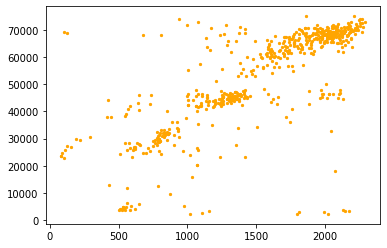

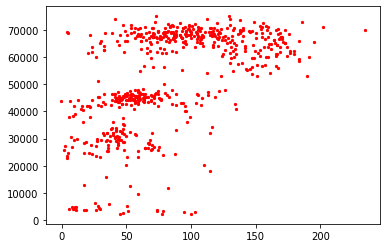

In [63]:
import matplotlib.pyplot as plt

data_corr_electricity_X = data_corr_electricity.loc[:, ['소계', '수분 함유량']]
data_corr_electricity_Y = data_corr_electricity.iloc[:, 0]
print(data_corr_electricity_X.shape)
#print(data_corr_electricity_X_drop.shape)

plt.scatter(data_corr_electricity_X['소계'], data_corr_electricity_Y, s=5, c='orange')
plt.show()

plt.scatter(data_corr_electricity_X['수분 함유량'], data_corr_electricity_Y, s=5, c='red')
plt.show()

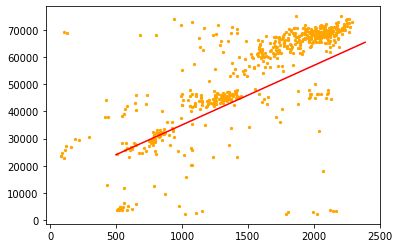

In [64]:
import numpy as np
reg = LinearRegression().fit(data_corr_electricity_X, data_corr_electricity_Y)
y_pred = reg.predict(data_corr_electricity_X)

#plt.plot(data_corr_electricity_X, data_corr_electricity_Y, alpha=0.7)
#plt.plot(data_corr_electricity_X, y_pred, color='red')
#plt.show()
plt.scatter(data_corr_electricity_X['소계'], data_corr_electricity_Y, s=5, c='orange')
plt.plot(np.arange(500, 2400, 10), reg.coef_[0]*np.arange(500, 2400, 10)+reg.intercept_, c='red')
plt.show()
#print(reg.coef_)
#print(reg.intercept_)
#print("MSE : ", mean_squared_error(data_corr_electricity_Y, y_pred))

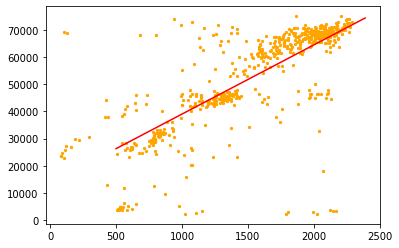

In [65]:
reg_2 = LinearRegression().fit(data_corr_electricity_X['소계'].values.reshape(-1, 1), data_corr_electricity_Y)
plt.scatter(data_corr_electricity_X['소계'], data_corr_electricity_Y, s=5, c='orange')
plt.plot(np.arange(500, 2400, 10), reg_2.coef_[0]*np.arange(500,2400,10)+reg_2.intercept_, c='red')
plt.show()

## 데이터를 따로 떨어트린다

(617, 3)

(585, 3)

(570, 3)



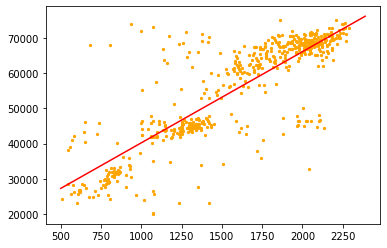

In [70]:
data_reshape_electricity = data_corr_electricity.loc[:, ['전력', '소계', '수분 함유량']]
print(data_reshape_electricity.shape)
print()

data_electricity_under_20000 = data_reshape_electricity[:][data_reshape_electricity['전력']<20000]
data_reshape_electricity = data_reshape_electricity[:][data_reshape_electricity['전력']>=20000]
print(data_reshape_electricity.shape)
print()

data_electricity_under_500 = data_reshape_electricity[:][data_reshape_electricity['소계']<500]
data_reshape_electricity = data_reshape_electricity[:][data_reshape_electricity['소계']>=500]
print(data_reshape_electricity.shape)
print()

reg_3 = LinearRegression().fit(data_reshape_electricity['소계'].values.reshape(-1, 1), data_reshape_electricity['전력'])
plt.scatter(data_reshape_electricity['소계'], data_reshape_electricity['전력'], s=5, c='orange')
plt.plot(np.arange(500, 2400, 10), reg_3.coef_[0]*np.arange(500,2400,10)+reg_3.intercept_, c='red')
plt.show()

## 데이터 특징 분석

1. 전력 사용량 < 20000
1. 소계 < 500

In [44]:
print(data_corr_electricity.head())
data_electricity_under_20000 = data_corr_electricity[:][data_corr_electricity['전력']<20000]
print(data_electricity_under_20000.info())
print()

print(data_electricity_under_20000.shape)
print()
print(data_electricity_under_20000)

           전력    도시가스(LNG)   슬래그파우더       소계  수분 함유량  수분 함유율  평균 상대습도
1100  67922.4  8373.803245  1881.55  1977.80   96.25     4.9     59.8
1101  69401.7   315.345067  1931.55  2030.90   99.35     4.9     51.6
1102  68093.7   305.117745  1889.04  1988.20   99.16     5.0     51.9
1103  68749.2  8429.976066  1948.28  2086.31  138.03     6.6     62.4
1104  40976.7  8438.766291  1081.48  1137.58   56.10     4.9     65.9
<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1135 to 1822
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   전력         32 non-null     float64
 1   도시가스(LNG)  32 non-null     float64
 2   슬래그파우더     32 non-null     float64
 3   소계         32 non-null     float64
 4   수분 함유량     32 non-null     float64
 5   수분 함유율     32 non-null     float64
 6   평균 상대습도    32 non-null     float64
dtypes: float64(7)
memory usage: 2.0 KB
None

(32, 7)

           전력     도시가스(LNG)   슬래그파우더       소계  수분 함유량  수분 